<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des Régions de Confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy d’un sous-problème de
régions de confiance (fichier `Pas_De_Cauchy.jl`). La spécification de cet algorithme est donnée ci-dessous.

In [51]:
using LinearAlgebra
using Documenter
using Markdown  
include("Pas_De_Cauchy.jl")


Pas_De_Cauchy

2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du Pas de Cauchy. Vous créerez pour cela un fichier `tester_pas_de_Cauchy.jl` dans le répertoire `test` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [52]:
using Test

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_pas_de_Cauchy.jl")
include("../src/Pas_De_Cauchy.jl")

@testset "Test algo Pas_De_Cauchy" begin
	# Tester l'algorithme de Newton	
	tester_pas_de_Cauchy(Pas_De_Cauchy)
end;

Test Summary:           | Pass  Total  Time
Test algo Pas_De_Cauchy |    8      8  0.2s


3. Coder l'algorithme des Régions de Confiance (fichier `Regions_De_Confiance.jl`). Sa spécification est donnée ci-dessous.

In [53]:
include("Regions_De_Confiance.jl")
# @doc Regions_De_Confiance

Regions_De_Confiance (generic function with 1 method)

4. Vérifier que les tests ci-dessous passent.

In [54]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Regions_De_Confiance.jl")

affiche = false

@testset "Test rc avec cauchy" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

iters = 864
Test Summary:       | Pass  Total  Time
Test rc avec cauchy |   15     15  0.7s


In [55]:
using LinearAlgebra
using Markdown         

include("Pas_De_Cauchy.jl")
include("Regions_De_Confiance.jl")
# Affichage les sorties de l'algorithme des Régions de confiance
function afficher_resultat(algo,nom_fct,point_init,xmin,fxmin,flag,nbiters)
	println("-------------------------------------------------------------------------")
	printstyled("Résultats de : ",algo, " appliqué à ",nom_fct, " au point initial ", point_init, ":\n",bold=true,color=:blue)
	println("  * xsol = ",xmin)
	println("  * f(xsol) = ",fxmin)
	println("  * nb_iters = ",nbiters)
	println("  * flag = ",flag)
	println("")
end

# probleme 1
f1(x) = 2*(x[1]+x[2]+x[3]-3)^2 + (x[1]-x[2])^2 + (x[2]-x[3])^2
grad_f1(x) = [4*(x[1]+x[2]+x[3]-3) + 2*(x[1]-x[2]);4*(x[1]+x[2]+x[3]-3) - 2*(x[1]-x[2]) + 2*(x[2]-x[3]) ;4*(x[1]+x[2]+x[3]-3) - 2*(x[2]-x[3]) ]
hessienne_f1(x) = [6. 2. 4. ; 2. 8. 2. ; 4. 2. 6.] 

x011 = [1.; 1. ;2.]
x012 = [0. ;1. ;-0.8]
x015 = [36. ;38. ;97.]

options1 = [10 0.999999 1.000000000001 0.1 0.9 2 150 1e-15 1e-15 sqrt(eps()) ]
options2 = [10 0.99999999999 1.00000000000001 0.6 0.7 2 150 1e-15 1e-15 sqrt(eps()) ]


xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hessienne_f1,x011,[])
afficher_resultat("Regions de confiance avec pas de Cauchy","f1",x011,xmin,fxmin,flag,nb_iters)

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hessienne_f1,x011,[])
afficher_resultat("Regions de confiance avec pas de Cauchy","f1",x011,xmin,fxmin,flag,nb_iters)

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hessienne_f1,x012,[])
afficher_resultat("Regions de confiance avec pas de Cauchy","f1",x012,xmin,fxmin,flag,nb_iters)

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hessienne_f1,x015,[])
afficher_resultat("Regions de confiance avec pas de Cauchy","f1",x015,xmin,fxmin,flag,nb_iters)


-------------------------------------------------------------------------
Résultats de : Regions de confiance avec pas de Cauchy appliqué à f1 au point initial [1.0, 1.0, 2.0]:
  * xsol = [0.9999937692922686, 1.0000012485903609, 1.0000087278884533]
  * f(xsol) = 1.3994140191589913e-10
  * nb_iters = 32
  * flag = 2

-------------------------------------------------------------------------
Résultats de : Regions de confiance avec pas de Cauchy appliqué à f1 au point initial [1.0, 1.0, 2.0]:
  * xsol = [0.9999937692922686, 1.0000012485903609, 1.0000087278884533]
  * f(xsol) = 1.3994140191589913e-10
  * nb_iters = 32
  * flag = 2

-------------------------------------------------------------------------
Résultats de : Regions de confiance avec pas de Cauchy appliqué à f1 au point initial [0.0, 1.0, -0.8]:
  * xsol = [1.0000038330515315, 0.999998977091227, 0.9999941211309225]
  * f(xsol) = 6.599486340356337e-11
  * nb_iters = 30
  * flag = 2

-----------------------------------------------

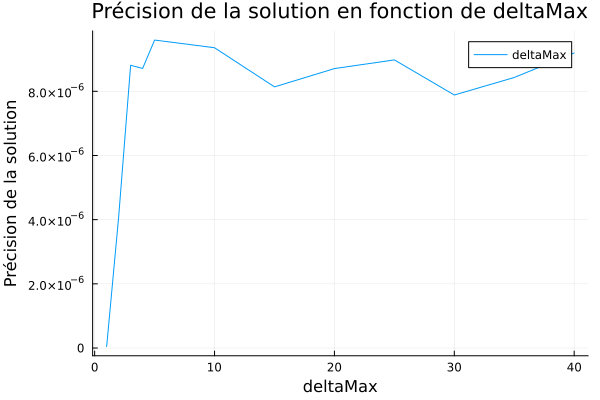

In [83]:
using Plots

include("Lagrangien_Augmente.jl")

listeMu0 = [1,2, 3, 4, 5,10,15,20,25, 30,35, 40]
liste_sol = []

# initialisation des paramètres avec un petit mu0
deltaMax = 10
gamma1 = 0.5
gamma2 = 2.00
eta1 = 0.25
eta2 = 0.75
delta0 = 2
max_iter = 1000
Tol_abs = sqrt(eps())
Tol_rel = 1e-15
epsilon = 1.e-2
options = [deltaMax, gamma1, gamma2, eta1, eta2, delta0, max_iter, Tol_abs, Tol_rel, epsilon]
sol_fct1_augm = [1.0, 1.0, 1.0]

for mu0 in listeMu0
	options[1] = mu0
	xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hessienne_f1,x015,options)
	push!(liste_sol, norm(xmin-sol_fct1_augm))
end

plot(listeMu0, liste_sol, label="deltaMax", xlabel="deltaMax", ylabel="Précision de la solution", title="Précision de la solution en fonction de deltaMax", legend=:topright)

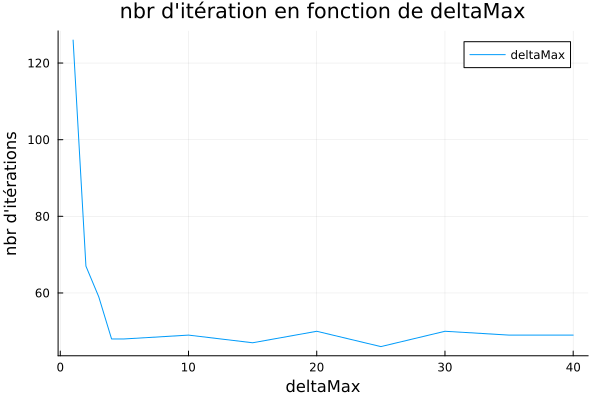

In [80]:
using Plots

include("Lagrangien_Augmente.jl")

listeMu0 = [1,2, 3, 4, 5,10,15,20,25, 30,35, 40]
liste_sol = []

# initialisation des paramètres avec un petit mu0
deltaMax = 10
gamma1 = 0.5
gamma2 = 2.00
eta1 = 0.25
eta2 = 0.75
delta0 = 2
max_iter = 1000
Tol_abs = sqrt(eps())
Tol_rel = 1e-15
epsilon = 1.e-2
options = [deltaMax, gamma1, gamma2, eta1, eta2, delta0, max_iter, Tol_abs, Tol_rel, epsilon]

for mu0 in listeMu0
	options[1] = mu0
	xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hessienne_f1,x015,options)
	push!(liste_sol, nb_iters)
end

plot(listeMu0, liste_sol, label="deltaMax", xlabel="deltaMax", ylabel="nbr d'itérations", title="nbr d'itération en fonction de deltaMax", legend=:topright)

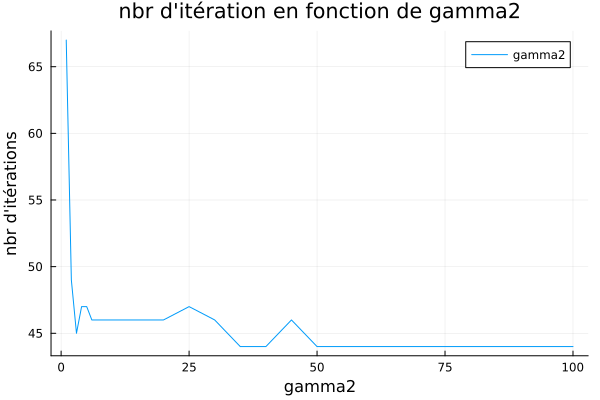

In [100]:
using Plots

include("Lagrangien_Augmente.jl")

listeMu0 = [1,2, 3, 4, 5,6,7,8,9,10,15,20,25, 30,35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
liste_sol = []

# initialisation des paramètres avec un petit mu0
deltaMax = 100
gamma1 = 0.5
gamma2 = 2.00
eta1 = 0.25
eta2 = 0.75
delta0 = 2
max_iter = 1000
Tol_abs = sqrt(eps())
Tol_rel = 1e-15
epsilon = 1.e-2
options = [deltaMax, gamma1, gamma2, eta1, eta2, delta0, max_iter, Tol_abs, Tol_rel, epsilon]

for mu0 in listeMu0
	options[3] = mu0
	xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hessienne_f1,x015,options)
	push!(liste_sol, nb_iters)
end

plot(listeMu0, liste_sol, label="gamma2", xlabel="gamma2", ylabel="nbr d'itérations", title="nbr d'itération en fonction de gamma2", legend=:topright)

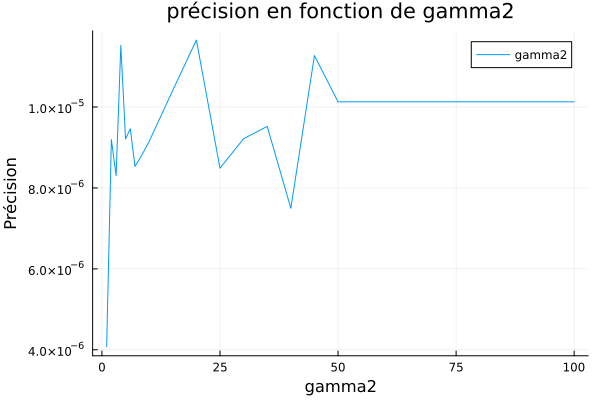

In [99]:
using Plots

include("Lagrangien_Augmente.jl")

listeMu0 = [1,2, 3, 4, 5,6,7,8,9,10,15,20,25, 30,35, 40,45,50,55,60,65,70,75,80,85,90,95,100]
liste_sol = []

# initialisation des paramètres avec un petit mu0
deltaMax = 100
gamma1 = 0.5
gamma2 = 2.00
eta1 = 0.25
eta2 = 0.75
delta0 = 2
max_iter = 1000
Tol_abs = sqrt(eps())
Tol_rel = 1e-15
epsilon = 1.e-2
options = [deltaMax, gamma1, gamma2, eta1, eta2, delta0, max_iter, Tol_abs, Tol_rel, epsilon]
x_sol = [1.0, 1.0, 1.0]
for mu0 in listeMu0
	options[3] = mu0
	xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hessienne_f1,x015,options)
	push!(liste_sol, norm(xmin-x_sol))
end

plot(listeMu0, liste_sol, label="gamma2", xlabel="gamma2", ylabel="Précision", title="précision en fonction de gamma2", legend=:topright)

## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit $$ f_{1} : \mathbf{R}^3 \rightarrow \mathbf{R}$$ $$ (x_1,x_2, x_3) \mapsto  2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2$$ Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de Newton et RC-Pas de Cauchy sur cette fonction.

2.  Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

### Réponse
## Question 1
$f_1$ est une fonction quadratique, donc elle est exactement égale a son modèle de Taylor à l'ordre 2. Donc l'algo de Newton converge en une seule itération, ce qui montre que l'algo de Newton est plus performant que l'algo de RC-Pas de Cauchy sur $f_1$:
- Pour $x_{011}$ :itérations pour RC-Pas de Cauchy : 32, itération pour Newton : 1
- Pour $x_{012}$ :itérations pour RC-Pas de Cauchy : 32, itération pour Newton : 1
- Pour $x_{013}$ :itérations pour RC-Pas de Cauchy : 30, itération pour Newton : 1
- Pour $x_{014}$ :itérations pour RC-Pas de Cauchy : 45, itération pour Newton : 1

## Question 2
Le rayon de confiance maximal, le facteur d'agrandissement et le facteur de réduction de la région de confiance influent la performance de l'algorithme.

De plus, on remarque que lorsque que $\Delta_{max}$ augmente et vaut plus de 3, le nombre d'itération et la précision stagnent. Quand 0<$\Delta_{max}$<3 , le nombre d'itération est beaucoup plus grand et la précision augmente par rapport au cas $\Delta_{max}$ > 3. De même,
on remarque que lorsque que $\eta_1$ augmente, le nombre d'itération augmente.

Enfin, on remarque que lorsque $\gamma_2$ augmente, le nombre d'itération diminue et la précision varie peu. A partir de $\gamma_2$ = 50, la précision est constante.




# Régions de confiance avec Gradient Conjugué
## Implémentation 

1. Implémenter l’algorithme du Gradient Conjugué Tronqué (fichier `Gradient_Conjugue_Tronque.jl`). Sa spécification est donnée ci-dessous.

In [57]:
include("Gradient_Conjugue_Tronque.jl")
 @doc Gradient_Conjugue_Tronque

#### Objet

Cette fonction calcule une solution approchée du problème

$$
\min_{||s||< \Delta}  q(s) = s^{t} g + \frac{1}{2} s^{t}Hs
$$

par l'algorithme du gradient conjugué tronqué

#### Syntaxe

```julia
s = Gradient_Conjugue_Tronque(g,H,option)
```

#### Entrées :

  * g : (Array{Float,1}) un vecteur de $\mathbb{R}^n$
  * H : (Array{Float,2}) une matrice symétrique de $\mathbb{R}^{n\times n}$
  * options          : (Array{Float,1})

      * delta    : le rayon de la région de confiance
      * max_iter : le nombre maximal d'iterations
      * tol      : la tolérance pour la condition d'arrêt sur le gradient

#### Sorties:

  * s : (Array{Float,1}) le pas s qui approche la solution du problème : $min_{||s||< \Delta} q(s)$

#### Exemple d'appel:

```julia
gradf(x)=[-400*x[1]*(x[2]-x[1]^2)-2*(1-x[1]) ; 200*(x[2]-x[1]^2)]
hessf(x)=[-400*(x[2]-3*x[1]^2)+2  -400*x[1];-400*x[1]  200]
xk = [1; 0]
options = []
s = Gradient_Conjugue_Tronque(gradf(xk),hessf(xk),options)
```


2. Vérifier que les tests ci-dessous passent.

In [58]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_gct.jl")
include("../src/Gradient_Conjugue_Tronque.jl")

affiche = false

@testset "Test gct" begin
	tester_gct(affiche,Gradient_Conjugue_Tronque)
end;

Test Summary: | Pass  Total  Time
Test gct      |    9      9  0.3s


3. Intégrer l’algorithme du Gradient Conjugué Tronqué dans le code de régions de confiance (fichier `Regions_De_Confiance.jl`).

4. Décommenter les tests avec le gradient conjugué dans `tester_regions_de_confiance.jl` et vérifier que les tests passent.

In [59]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")

affiche = false

@testset "Test rc avec cauchy et gct" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

iters = 864
Test Summary:              | Pass  Total  Time
Test rc avec cauchy et gct |   15     15  0.7s


In [60]:
using LinearAlgebra
using Markdown         

include("Pas_De_Cauchy.jl")
include("Regions_De_Confiance.jl")
include("Gradient_Conjugue_Tronque.jl")

# Affichage les sorties de l'algorithme des Régions de confiance
function afficher_resultat(algo,nom_fct,point_init,xmin,fxmin,flag,nbiters)
	println("-------------------------------------------------------------------------")
	printstyled("Résultats de : ",algo, " appliqué à ",nom_fct, " au point initial ", point_init, ":\n",bold=true,color=:blue)
	println("  * xsol = ",xmin)
	println("  * f(xsol) = ",fxmin)
	println("  * nb_iters = ",nbiters)
	println("  * flag = ",flag)
	println("")
end

# probleme 1
f1(x) = 2*(x[1]+x[2]+x[3]-3)^2 + (x[1]-x[2])^2 + (x[2]-x[3])^2
grad_f1(x) = [4*(x[1]+x[2]+x[3]-3) + 2*(x[1]-x[2]);4*(x[1]+x[2]+x[3]-3) - 2*(x[1]-x[2]) + 2*(x[2]-x[3]) ;4*(x[1]+x[2]+x[3]-3) - 2*(x[2]-x[3]) ]
hessienne_f1(x) = [6. 2. 4. ; 2. 8. 2. ; 4. 2. 6.] 

x011 = [1.; 1. ;2.]
x012 = [0. ;1. ;-0.8]
x015 = [36. ;38. ;97.]


xmin,fxmin,flag,nb_iters = Regions_De_Confiance("gct",f1,grad_f1,hessienne_f1,x011,[])
afficher_resultat("Regions de confiance avec pas de gct","f1",x011,xmin,fxmin,flag,nb_iters)

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("gct",f1,grad_f1,hessienne_f1,x011,[])
afficher_resultat("Regions de confiance avec pas de gct","f1",x011,xmin,fxmin,flag,nb_iters)

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("gct",f1,grad_f1,hessienne_f1,x012,[])
afficher_resultat("Regions de confiance avec pas de gct","f1",x012,xmin,fxmin,flag,nb_iters)

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("gct",f1,grad_f1,hessienne_f1,x015,[])
afficher_resultat("Regions de confiance avec pas de gct","f1",x015,xmin,fxmin,flag,nb_iters)


-------------------------------------------------------------------------
Résultats de : Regions de confiance avec pas de gct appliqué à f1 au point initial [1.0, 1.0, 2.0]:
  * xsol = [1.0, 1.0, 1.0]
  * f(xsol) = 0.0
  * nb_iters = 1
  * flag = 0

-------------------------------------------------------------------------
Résultats de : Regions de confiance avec pas de gct appliqué à f1 au point initial [1.0, 1.0, 2.0]:
  * xsol = [1.0, 1.0, 1.0]
  * f(xsol) = 0.0
  * nb_iters = 1
  * flag = 0

-------------------------------------------------------------------------
Résultats de : Regions de confiance avec pas de gct appliqué à f1 au point initial [0.0, 1.0, -0.8]:
  * xsol = [1.0, 1.0, 1.0]
  * f(xsol) = 0.0
  * nb_iters = 2
  * flag = 0

-------------------------------------------------------------------------
Résultats de : Regions de confiance avec pas de gct appliqué à f1 au point initial [36.0, 38.0, 97.0]:
  * xsol = [0.9999999999999999, 0.9999999999999999, 1.0]
  * f(xsol) = 1

## Interprétation  

1. Comparer la décroissance obtenue avec celle du pas de Cauchy, en imposant la sortie
dans l’algorithme au bout d’une itération seulement. Vous donnerez ci-après des résultats numériques. 
    1. Que remarquez vous ?
    2. Comparer la décroissance obtenue avec celle du pas de Cauchy dans le cas général.

3. Quels sont les avantages et inconvénients des deux approches ?

### Réponse
## Question 1.1
on remarque que le gradient conjugue tronque offre au mieux une meilleure approximation, au pire une approximation similaire au pas de Cauchy
## Question 1.2
Dans le cas général, la décroissance obtenue par le gradient conjugue tronque est meilleure et plus précise que celle obtenue par le pas de cauchy.
## Question 2
Les avantages du gradient conjugue tronque sont: 
Plus précis que le Pas de Cauchy du à son pas et à sa direction calculée à chaque itération, convergence assez rapidement.

Les avantages/incovénients du Pas de Cauchy sont:
Converge en une itération, donc plus rapide que le gradient conjugue tronque mais moins précis, possibilité de saturation la boule (delta).

